# Компьютерное зрение

# Работа с изображениями в нейронных сетях

## Полносвязная сеть
<img src="images/II3/mnist_fc.png" width=60% height=60%>
Количество весов первого слоя = высота * ширина * каналы * количество нейронов скрытого слоя

## Свёртка
Свертка (англ. convolution) — это операция, показывающая «схожесть» одной функции с отражённой и сдвинутой копией другой. Понятие свёртки обобщается для функций, определённых на группах, а также мер. 
<img src="images/convolution.jpeg" width=60% height=60%>

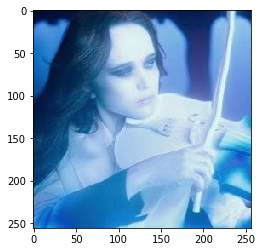

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('data/Vanya.jpg')[..., ::-1]
plt.imshow(image)
plt.show()

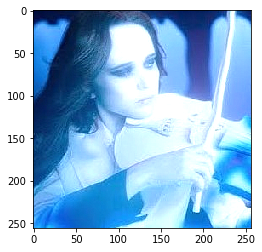

In [2]:
# увеличение чёткости
kernel = np.array([
    [-0.1, -0.1, -0.1],
    [-0.1,    2, -0.1],
    [-0.1, -0.1, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

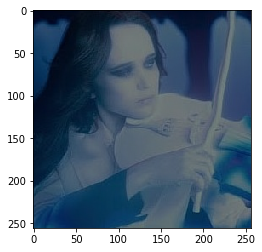

In [3]:
# затемнение
kernel = np.array([
    [-0.1,  0.1, -0.1],
    [ 0.1,  0.5,  0.1],
    [-0.1,  0.1, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

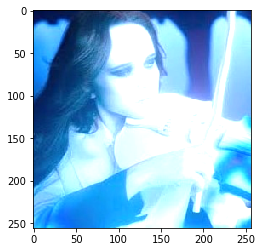

In [4]:
# увеличение яркости
kernel = np.array([
    [-0.1,  0.2, -0.1],
    [ 0.2,    1,  0.2],
    [-0.1,  0.2, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

### Ядра нейронной сети
<img src="images/II3/kernels.jpeg" width=60% height=60%>
Каждый из 96 фильтров, показанных здесь, имеет размер 11x11x3

# Свёрточный слой
<img src="images/II3/conv1.png" width=60% height=60%>

## Max Pooling
<img src="images/II3/maxpool.jpeg" width=60% height=60%>

## Свёрточная сеть
<img src="images/II3/convnet.jpeg" width=80% height=80%>
Карты активации примера архитектуры ConvNet. Первоначальные данные представляют собой необработанные пиксели изображения (слева), а последний выход хранит оценки классов (справа).

### Padding
<img src="images/II3/pad.png" width=60% height=60%>

### Stride
<img src="images/II3/stride.png" width=60% height=60%>
Шаг (stride) 3 и 2 по высоте и ширине соответственно.

# Image Net
<img src="images/II3/imagenet.jpeg" width=30% height=30%>
На август 2017 года в ImageNet 14 197 122 изображения, разбитых на 21 841 категорию.
<img src="images/II3/imagenet_err.png" width=60% height=60%>

## AlexNet
Архитектура AlexNet состоит из пяти свёрточных слоёв, между которыми располагаются pooling-слои и слои нормализации, а завершают нейросеть три полносвязных слоя.  
На схеме архитектуры все выходные изображения делятся на два одинаковых участка — это связано с тем, что нейросеть обучалась на старых GPU GTX580, у которых было всего 3 ГБ видеопамяти. Для обработки использовались две видеокарты, чтобы параллельно выполнять операции над двумя частями изображения.
<img src="images/II3/alexnet.png" width=80% height=80%>

## VGG
Основная идея VGG-архитектур — использование большего числа слоёв с фильтрами меньшего размера. Существуют версии VGG-16 и VGG-19 с 16 и 19 слоями соответственно.  
С маленькими фильтрами получается не так много параметров, но при этом мы сможем гораздо эффективнее обрабатывать их.
<img src="images/II3/vgg.png" width=50% height=50%>

## ResNet
Создатели ResNet решили не складывать слои друг на друга для изучения отображения нужной функции напрямую, а использовать остаточные блоки, 
которые пытаются «подогнать» это отображение. Так ResNet стала первой остаточной нейронной сетью. 
Иначе говоря, она «перепрыгивает» через некоторые слои. Они больше не содержат признаков и используются для нахождения остаточной функции H(x) = F(x) + x вместо того, чтобы искать H(x) напрямую.
<img src="images/II3/res_block.png" width=80% height=80%>

## ResNet
В результате экспериментов с ResNet выяснилось, что очень глубокие сети действительно можно обучить без ухудшения точности. Нейросеть достигла наименьшей ошибки в задачах классификации, которая превзошла даже человеческий результат.
<img src="images/II3/resnet.png" width=50% height=50%>

# Сегментация изображений
<img src="images/segment.jpg" width=80% height=80%>

## Fully Convolutional Network
<img src="images/II3/FCN8.ppm" width=80% height=80%>

# SegNet
<img src="images/II3/segnet.png" width=80% height=80%>

# UNet
<img src="images/II3/unet.png" width=80% height=80%>

## Метрика
Intersection over union (IoU)
<img src="images/II3/iou.png" width=40% height=40%>

## Функция потерь

* Cross entropy
* Weighted cross entropy
* DICE
$$ DC = 1 - {2\sum y_i p_i \over \sum y_i + \sum p_i} $$

# Детекция
<img src="images/detect.jpg" width=80% height=80%>

## Non-maximum Suppression (NMS)
Алгоритм:  
1) Выбрать область с наибольшией уверенностью и запомнить его  
2) Найти IoU с оставшимися областями  
3) Удалить области с IoU больше заданного порога  
4) Повторять пп. 1-3, пока все области не отфильтруются  
<img src="images/II3/nms.png" width=80% height=80%>

# Single Shot Detectors

## Yolo
Изображение делится на части и предсказывается отдельно для каждой части
<img src="images/II3/yolo_grid.jpeg" width=80% height=80%>

Каждая часть предсказывает координаты, уверенность и вероятность каждого из 20 классов
<img src="images/II3/yolo.png" width=80% height=80%>

## SSD
<img src="images/II3/ssd.jpeg" width=80% height=80%>

# Two Shot Detectors

## R-CNN
<img src="images/II3/rcnn.png" width=80% height=80%>

## R-CNN
<img src="images/II3/rcnn_conv.png" width=50% height=50%>

## Fast R-CNN
<img src="images/II3/fast_rcnn.png" width=80% height=80%>

## Faster R-CNN
<img src="images/II3/faster_rcnn.png" width=50% height=50%>

## Сравнение скоростей
<img src="images/II3/rcnn_speed.png" width=80% height=80%>

# OpenCV

In [7]:
# Получение видео. Объект VideoCapture позволяет работать с видеопотоком с камеры или из файла
# Для работы с файлом указывается путь к нему, для работы с вебкамерой указывается её номер, начиная с 0
cap = cv2.VideoCapture(0)
# Кадр получается с помощью метода read (возвращается флаг успешной операции и кадр)
ret, frame = cap.read()
# После работы с камерой VideoCapture освобождается
cap.release()

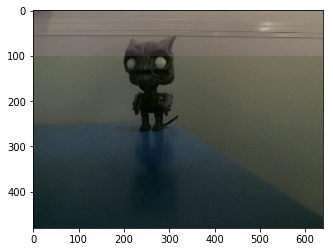

In [10]:
# Изображение получается в формате BGR
plt.imshow(frame)
plt.show()

In [11]:
# OpenCV позволяет выводить кадры в отдельном окне. Для этого служит функция imshow
# На вход подаётся изображение в формате BGR
# Первым аргументом укзывается имя окна
cv2.imshow('Frame', frame)
# Для задержки показа используется функция waitKey
# Аргумент указывает задержку в мс. Если 0, то ждёт нажатия любой клавиши
# Функция waitKey возвращает код нажатой клавиши
cv2.waitKey(0)
# После работы с ним окно удаляется
cv2.destroyWindow('Frame')

### Воспроизведение видео

In [12]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    key = cv2.waitKey(20) & 0xff
    cv2.imshow('Frame', frame)
    if key == 27: # Esc
        break
        
cv2.destroyWindow('Frame')
cap.release()

# Рисование

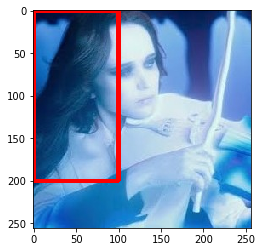

In [13]:
# Прямоугольник
image2 = image.copy()
cv2.rectangle(image2, (0, 0), (100, 200), (255, 0, 0), 4)
plt.imshow(image2)
plt.show()

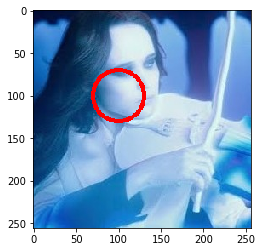

In [14]:
# Круг
image2 = image.copy()
cv2.circle(image2, (100, 100), 30, (255, 0, 0), 4)
plt.imshow(image2)
plt.show()

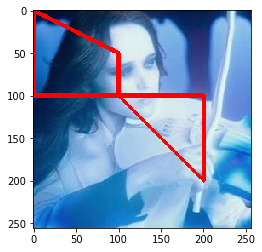

In [44]:
# Контур
image2 = image.copy()
contours = [
    np.array([(0, 0), (0, 100), (100, 100), (100, 50)]),
    np.array([(200, 200), (100, 100), (200, 100)]),
]
cv2.drawContours(image2, contours, -1, (255, 0, 0), 4)

plt.imshow(image2)
plt.show()

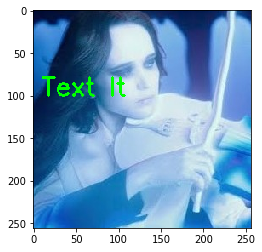

In [25]:
# Текст
image2 = image.copy()
cv2.putText(image2, 'Text It', (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
plt.imshow(image2)
plt.show()

# Работа с изображением

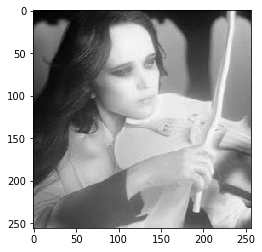

In [29]:
# Перевод в градации серого
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.show()

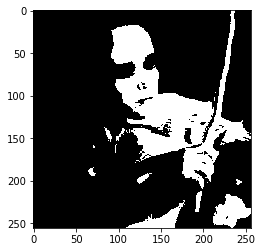

In [36]:
# Бинаризация
_, thresh = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()

In [41]:
# Поиск контуров
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours), contours[2])

71 [[[133 247]]

 [[134 246]]

 [[135 247]]

 [[134 248]]]


# Задания

1. Для данных Nails segmentation объедините пары изображение-маска
2. Выведите по очереди пары с помощью OpenCV эти пары (переключение по нажатию клавиши)
3. Выделите контуры на масках и отрисуйте их на изображениях
4. Воспроизведите видеофайл с помощью OpenCV в градациях серого